# Sonar (Rock or Mine?)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
import graphviz as gv

## Dataset

The dataset has no headers. The headers will be set as **attr_ + index**, except the last column, which has the classes. This will be set as **class**.

In [2]:
# root = 'C:\Users\mcoel\Documents\pos_ai\datasets'
path = './datasets/sonar/sonar.csv'
cols = ['attr_' + str(i) for i in range(1, 61)]
cols.append('class')
df = pd.read_csv(path, names=cols)

### Display information about the dataframe

In [3]:
df.head()

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,...,attr_52,attr_53,attr_54,attr_55,attr_56,attr_57,attr_58,attr_59,attr_60,class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   attr_1   208 non-null    float64
 1   attr_2   208 non-null    float64
 2   attr_3   208 non-null    float64
 3   attr_4   208 non-null    float64
 4   attr_5   208 non-null    float64
 5   attr_6   208 non-null    float64
 6   attr_7   208 non-null    float64
 7   attr_8   208 non-null    float64
 8   attr_9   208 non-null    float64
 9   attr_10  208 non-null    float64
 10  attr_11  208 non-null    float64
 11  attr_12  208 non-null    float64
 12  attr_13  208 non-null    float64
 13  attr_14  208 non-null    float64
 14  attr_15  208 non-null    float64
 15  attr_16  208 non-null    float64
 16  attr_17  208 non-null    float64
 17  attr_18  208 non-null    float64
 18  attr_19  208 non-null    float64
 19  attr_20  208 non-null    float64
 20  attr_21  208 non-null    float64
 21  attr_22  208 non

In [5]:
df.describe()

,attr_1,attr_2,attr_3,attr_4,attr_5,attr_6,attr_7,attr_8,attr_9,attr_10,...,attr_51,attr_52,attr_53,attr_54,attr_55,attr_56,attr_57,attr_58,attr_59,attr_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


The dataframe has 61 columns with data type 'float64'. Each column represents an attribute with 208 non-null entries. The last column has the labels that defines the 2 possible classes for each entry, 'M' or 'R' (Mine or Rock).

### Describe

  1. **High variabilty**: The `std` has magnitude close to the `mean`. The `max` values are much higher than the 75% percentile, which indicates the presence of **outlier values**.
  
  2. **Date range**: The values range between 0 and 1.


# Plots

The attributes seem to represent a location in which the signal of the sonar is stronger in the center and weaker in the extremes. In the center the values are well distributed along the entire range (0 - 1) with no outliers. In the regions further away from the center the signals are lower and with less variability. Higher values in these regions are classified as outliers.

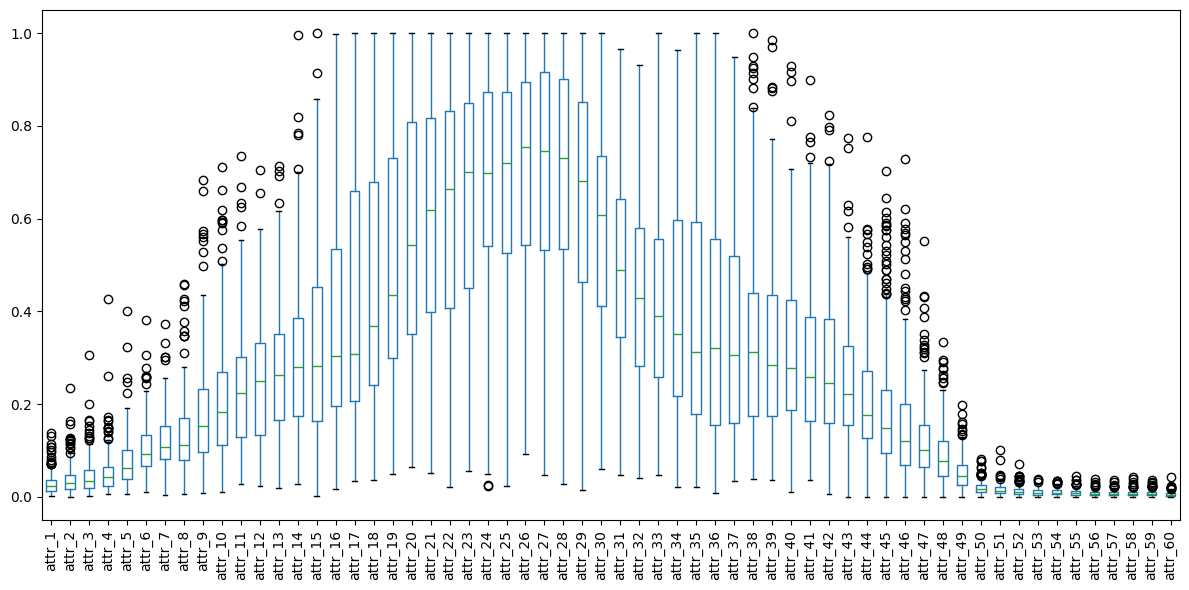

In [12]:
X_data = df.iloc[:, df.columns.values != 'class']
fig = plt.figure(figsize=(12, 6))
pd.plotting.boxplot(X_data, rot=90, grid=False)
plt.tight_layout()

## Decision Tree

Converting the classes to numeric.

In [13]:
le = LabelEncoder()
y_data = le.fit_transform(df.loc[:, 'class'])
y_data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Train/Test datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, random_state=0)

### Createting decision tree

In [16]:
sonar_tree = DecisionTreeClassifier(random_state=0, criterion='gini', min_samples_leaf=3)
sonar_tree = sonar_tree.fit(X_train, y_train)
print('Accuracy', sonar_tree.score(X_train, y_train))

Accuracy 0.9615384615384616


In [17]:
Train_predict = sonar_tree.predict(X_test)
print(classification_report(y_test, Train_predict))
print('Prediction accuracy', accuracy_score(y_test, Train_predict))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72        26
           1       0.72      0.69      0.71        26

    accuracy                           0.71        52
   macro avg       0.71      0.71      0.71        52
weighted avg       0.71      0.71      0.71        52

Prediction accuracy 0.7115384615384616


In [10]:
with open('sonar.dot', 'w') as f:
    f = tree.export_graphviz(sonar_tree, out_file=f)

In [11]:
dot_file = 'sonar.dot'
pdf_file = 'sonar.pdf'
gv.render('dot', 'pdf', dot_file)

'sonar.dot.pdf'